In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, MaxPooling2D
from keras.layers import GlobalAveragePooling1D, LSTM, Flatten, Conv2D, Reshape

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.utils import class_weight

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
def get_data():
    try:
        X = np.load("data_valence_physio_for_cnn.npy")
        Y = np.load("data_valence_label_for_cnn.npy")
        return X, Y
    except:
        print "No stored files found.. load from files first"

In [4]:
X, Y = get_data()
print X.shape
print Y.shape

(402, 800, 24)
(402, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5406f6e690>]],
      dtype=object)

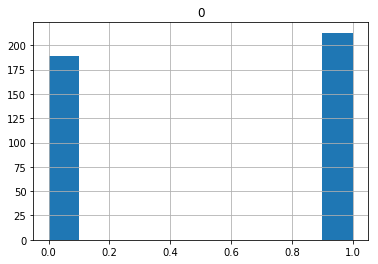

In [5]:
# binarize the problem
Y[Y<=4] = 0
Y[Y>=5] = 1
pd.DataFrame(Y).hist()

In [6]:
# compute class weight
cw = class_weight.compute_class_weight('balanced', np.unique(Y), Y.flatten())
print cw

[1.06349206 0.94366197]


In [43]:
input_shape = (X.shape[1], X.shape[2])
n_classes = Y.shape[1]

def create_model_1d():
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(rate=0.5))
    model.add(Dense(n_classes, activation='sigmoid'))
    
    loss = keras.losses.binary_crossentropy
    metrics = ['accuracy']
    
    model.compile(loss=loss, optimizer='adam', metrics=metrics)
    return model

def create_model_2d():
    
    d1, d2 = input_shape
    fixed_shape = (d1, d2, 1)
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=fixed_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    
    loss = keras.losses.binary_crossentropy
    metrics = ['accuracy']
    
    model.compile(loss=loss, optimizer='adam', metrics=metrics)
    return model

def create_model_2d_1d():
    
    d1, d2 = input_shape
    fixed_shape = (d1, d2, 1)
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=fixed_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())

    
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(rate=0.5))

    model.add(Flatten())
    
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    
    loss = keras.losses.binary_crossentropy
    metrics = ['accuracy']
    
    model.compile(loss=loss, optimizer='adam', metrics=metrics)
    return model

In [8]:
# create model
model = KerasClassifier(build_fn=create_model_1d, epochs=50, batch_size=16, verbose=0)

# evaluate using 10-fold cross validation
cv = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=cv, verbose=1)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Instructions for updating:
Use tf.cast instead.
Accuracy: 50.27% (8.40%)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 15.0min finished


In [33]:
# create model
model = KerasClassifier(build_fn=create_model_2d, epochs=20, batch_size=16, verbose=0)

# evaluate using 10-fold cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=seed)

d1, d2, d3 = X.shape
X_conv2d = X.reshape(d1, d2, d3, 1)

results = cross_val_score(model, X_conv2d, Y, cv=cv, verbose=1, n_jobs=-1)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 52.98% (3.12%)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 48.4min finished


In [44]:
# create model
model = KerasClassifier(build_fn=create_model_2d_1d, epochs=1, batch_size=16, verbose=0)

# evaluate using 10-fold cross validation
cv = KFold(n_splits=2, shuffle=True, random_state=seed)

d1, d2, d3 = X.shape
X_conv2d = X.reshape(d1, d2, d3, 1)

results = cross_val_score(model, X_conv2d, Y, cv=cv, verbose=1, n_jobs=-1)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


JoblibValueError: JoblibValueError
___________________________________________________________________________
...........................................................................
/opt/conda/envs/python2/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = ''
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/opt/conda/envs/python2/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x7f543e7a0230, file "/...2.7/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/opt/conda/e...python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_fname='/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x7f543e7a0230, file "/...2.7/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/opt/conda/e...python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
   1068                 self._events.update(event_pairs)
   1069                 while self._events:
   1070                     fd, events = self._events.popitem()
   1071                     try:
   1072                         fd_obj, handler_func = self._handlers[fd]
-> 1073                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
   1074                     except (OSError, IOError) as e:
   1075                         if errno_from_exception(e) == errno.EPIPE:
   1076                             # Happens when the client closes the connection
   1077                             pass

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2019, 8, 29, 12, 53, 23, 218542, tzinfo=tzlocal()), u'msg_id': u'a6cc4efd292042018c013a96595c8d7b', u'msg_type': u'execute_request', u'session': u'e92d1887253c41189ce4bd59c07a36f4', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'a6cc4efd292042018c013a96595c8d7b', 'msg_type': u'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['e92d1887253c41189ce4bd59c07a36f4']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2019, 8, 29, 12, 53, 23, 218542, tzinfo=tzlocal()), u'msg_id': u'a6cc4efd292042018c013a96595c8d7b', u'msg_type': u'execute_request', u'session': u'e92d1887253c41189ce4bd59c07a36f4', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'a6cc4efd292042018c013a96595c8d7b', 'msg_type': u'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['e92d1887253c41189ce4bd59c07a36f4'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2019, 8, 29, 12, 53, 23, 218542, tzinfo=tzlocal()), u'msg_id': u'a6cc4efd292042018c013a96595c8d7b', u'msg_type': u'execute_request', u'session': u'e92d1887253c41189ce4bd59c07a36f4', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'a6cc4efd292042018c013a96595c8d7b', 'msg_type': u'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', store_history=True, silent=False, shell_futures=True)
   2709                 self.displayhook.exec_result = result
   2710 
   2711                 # Execute the user code
   2712                 interactivity = "none" if silent else self.ast_node_interactivity
   2713                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2714                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2715                 
   2716                 self.last_execution_succeeded = not has_raised
   2717 
   2718                 # Reset this so later displayed values do not modify the

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Print object>], cell_name='<ipython-input-44-edc9ceb5564a>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 7f543c891d90, executi..._before_exec=None error_in_exec=None result=None>)
   2813 
   2814         try:
   2815             for i, node in enumerate(to_run_exec):
   2816                 mod = ast.Module([node])
   2817                 code = compiler(mod, cell_name, "exec")
-> 2818                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f53dd252b30, file "<ipython-input-44-edc9ceb5564a>", line 10>
        result = <ExecutionResult object at 7f543c891d90, executi..._before_exec=None error_in_exec=None result=None>
   2819                     return True
   2820 
   2821             for i, node in enumerate(to_run_interactive):
   2822                 mod = ast.Interactive([node])

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f53dd252b30, file "<ipython-input-44-edc9ceb5564a>", line 10>, result=<ExecutionResult object at 7f543c891d90, executi..._before_exec=None error_in_exec=None result=None>)
   2873         outflag = 1  # happens in more places, so it's easier as default
   2874         try:
   2875             try:
   2876                 self.hooks.pre_run_code_hook()
   2877                 #rprint('Running code', repr(code_obj)) # dbg
-> 2878                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f53dd252b30, file "<ipython-input-44-edc9ceb5564a>", line 10>
        self.user_global_ns = {'Activation': <class 'keras.layers.core.Activation'>, 'Conv1D': <class 'keras.layers.convolutional.Conv1D'>, 'Conv2D': <class 'keras.layers.convolutional.Conv2D'>, 'Dense': <class 'keras.layers.core.Dense'>, 'Dropout': <class 'keras.layers.core.Dropout'>, 'Flatten': <class 'keras.layers.core.Flatten'>, 'GlobalAveragePooling1D': <class 'keras.layers.pooling.GlobalAveragePooling1D'>, 'In': ['', u"input_shape = (X.shape[1], X.shape[2])\nn_clas...lasses, activation='softmax'))\n    return model", u'import numpy as np\nimport matplotlib.pyplot a... reproducibility\nseed = 7\nnp.random.seed(seed)', u'def get_data():\n    try:\n        X = np.load... "No stored files found.. load from files first"', u'X, Y = get_data()\nprint X.shape\nprint Y.shape', u'# binarize the problem\nY[Y<=4] = 0\nY[Y>=5] = 1\npd.DataFrame(Y).hist()', u"# compute class weight\ncw = class_weight.comp...'balanced', np.unique(Y), Y.flatten())\nprint cw", u"input_shape = (X.shape[1], X.shape[2])\nn_clas...lasses, activation='softmax'))\n    return model", u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u"input_shape = (X.shape[1], X.shape[2])\nn_clas...lasses, activation='softmax'))\n    return model", u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u"input_shape = (X.shape[1], X.shape[2])\nn_clas...lasses, activation='softmax'))\n    return model", u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KerasClassifier': <class 'keras.wrappers.scikit_learn.KerasClassifier'>, ...}
        self.user_ns = {'Activation': <class 'keras.layers.core.Activation'>, 'Conv1D': <class 'keras.layers.convolutional.Conv1D'>, 'Conv2D': <class 'keras.layers.convolutional.Conv2D'>, 'Dense': <class 'keras.layers.core.Dense'>, 'Dropout': <class 'keras.layers.core.Dropout'>, 'Flatten': <class 'keras.layers.core.Flatten'>, 'GlobalAveragePooling1D': <class 'keras.layers.pooling.GlobalAveragePooling1D'>, 'In': ['', u"input_shape = (X.shape[1], X.shape[2])\nn_clas...lasses, activation='softmax'))\n    return model", u'import numpy as np\nimport matplotlib.pyplot a... reproducibility\nseed = 7\nnp.random.seed(seed)', u'def get_data():\n    try:\n        X = np.load... "No stored files found.. load from files first"', u'X, Y = get_data()\nprint X.shape\nprint Y.shape', u'# binarize the problem\nY[Y<=4] = 0\nY[Y>=5] = 1\npd.DataFrame(Y).hist()', u"# compute class weight\ncw = class_weight.comp...'balanced', np.unique(Y), Y.flatten())\nprint cw", u"input_shape = (X.shape[1], X.shape[2])\nn_clas...lasses, activation='softmax'))\n    return model", u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u"input_shape = (X.shape[1], X.shape[2])\nn_clas...lasses, activation='softmax'))\n    return model", u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', u"input_shape = (X.shape[1], X.shape[2])\nn_clas...lasses, activation='softmax'))\n    return model", u'# create model\nmodel = KerasClassifier(build_...f%%)" % (results.mean()*100, results.std()*100))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KerasClassifier': <class 'keras.wrappers.scikit_learn.KerasClassifier'>, ...}
   2879             finally:
   2880                 # Reset our crash handler in place
   2881                 sys.excepthook = old_excepthook
   2882         except SystemExit as e:

...........................................................................
/home/jovyan/work/<ipython-input-44-edc9ceb5564a> in <module>()
      5 cv = KFold(n_splits=2, shuffle=True, random_state=seed)
      6 
      7 d1, d2, d3 = X.shape
      8 X_conv2d = X.reshape(d1, d2, d3, 1)
      9 
---> 10 results = cross_val_score(model, X_conv2d, Y, cv=cv, verbose=1, n_jobs=-1)
     11 
     12 print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py in cross_val_score(estimator=<keras.wrappers.scikit_learn.KerasClassifier object>, X=array([[[[3.20450519e-01],
         [4.80692514e...  [1.47023550e-01],
         [8.62213971e-03]]]]), y=array([[0],
       [0],
       [1],
       [0],
...
       [1],
       [1],
       [0],
       [0]]), groups=None, scoring=None, cv=KFold(n_splits=2, random_state=7, shuffle=True), n_jobs=-1, verbose=1, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')
    397                                 scoring={'score': scorer}, cv=cv,
    398                                 return_train_score=False,
    399                                 n_jobs=n_jobs, verbose=verbose,
    400                                 fit_params=fit_params,
    401                                 pre_dispatch=pre_dispatch,
--> 402                                 error_score=error_score)
        error_score = 'raise-deprecating'
    403     return cv_results['test_score']
    404 
    405 
    406 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py in cross_validate(estimator=<keras.wrappers.scikit_learn.KerasClassifier object>, X=array([[[[3.20450519e-01],
         [4.80692514e...  [1.47023550e-01],
         [8.62213971e-03]]]]), y=array([[0],
       [0],
       [1],
       [0],
...
       [1],
       [1],
       [0],
       [0]]), groups=None, scoring={'score': <function _passthrough_scorer>}, cv=KFold(n_splits=2, random_state=7, shuffle=True), n_jobs=-1, verbose=1, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, error_score='raise-deprecating')
    235         delayed(_fit_and_score)(
    236             clone(estimator), X, y, scorers, train, test, verbose, None,
    237             fit_params, return_train_score=return_train_score,
    238             return_times=True, return_estimator=return_estimator,
    239             error_score=error_score)
--> 240         for train, test in cv.split(X, y, groups))
        cv.split = <bound method KFold.split of KFold(n_splits=2, random_state=7, shuffle=True)>
        X = array([[[[3.20450519e-01],
         [4.80692514e...  [1.47023550e-01],
         [8.62213971e-03]]]])
        y = array([[0],
       [0],
       [1],
       [0],
...
       [1],
       [1],
       [0],
       [0]])
        groups = None
    241 
    242     zipped_scores = list(zip(*scores))
    243     if return_train_score:
    244         train_scores = zipped_scores.pop(0)

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    925                 # No need to wait for async callbacks to trigger to
    926                 # consumption.
    927                 self._iterating = False
    928 
    929             with self._backend.retrieval_context():
--> 930                 self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    931             # Make sure that we get a last message telling us we are done
    932             elapsed_time = time.time() - self._start_time
    933             self._print('Done %3i out of %3i | elapsed: %s finished',
    934                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Joblib worker traceback:
---------------------------------------------------------------------------
ValueError                                         Thu Aug 29 12:53:26 2019
PID: 1546                 Python 2.7.15: /opt/conda/envs/python2/bin/python
...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    220     def __call__(self):
    221         # Set the default nested backend to self._backend but do not set the
    222         # change the default number of processes to -1
    223         with parallel_backend(self._backend, n_jobs=self._n_jobs):
    224             return [func(*args, **kwargs)
--> 225                     for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (<keras.wrappers.scikit_learn.KerasClassifier object>, memmap([[[[3.20450519e-01],
          [4.8069251... [1.47023550e-01],
          [8.62213971e-03]]]]), array([[0],
       [0],
       [1],
       [0],
...
       [1],
       [1],
       [0],
       [0]]), {'score': <function _passthrough_scorer>}, array([  0,   1,   4,   5,   6,   7,   8,   9,  ..., 382, 383,
       389, 392, 394, 397, 398, 401]), array([  2,   3,  11,  14,  15,  16,  18,  20,  ..., 388, 390,
       391, 393, 395, 396, 399, 400]), 1, None, None)
        kwargs = {'error_score': 'raise-deprecating', 'return_estimator': False, 'return_times': True, 'return_train_score': False}
        self.items = [(<function _fit_and_score>, (<keras.wrappers.scikit_learn.KerasClassifier object>, memmap([[[[3.20450519e-01],
          [4.8069251... [1.47023550e-01],
          [8.62213971e-03]]]]), array([[0],
       [0],
       [1],
       [0],
...
       [1],
       [1],
       [0],
       [0]]), {'score': <function _passthrough_scorer>}, array([  0,   1,   4,   5,   6,   7,   8,   9,  ..., 382, 383,
       389, 392, 394, 397, 398, 401]), array([  2,   3,  11,  14,  15,  16,  18,  20,  ..., 388, 390,
       391, 393, 395, 396, 399, 400]), 1, None, None), {'error_score': 'raise-deprecating', 'return_estimator': False, 'return_times': True, 'return_train_score': False})]
    226 
    227     def __len__(self):
    228         return self._size
    229 

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=<keras.wrappers.scikit_learn.KerasClassifier object>, X=memmap([[[[3.20450519e-01],
          [4.8069251... [1.47023550e-01],
          [8.62213971e-03]]]]), y=array([[0],
       [0],
       [1],
       [0],
...
       [1],
       [1],
       [0],
       [0]]), scorer={'score': <function _passthrough_scorer>}, train=array([  0,   1,   4,   5,   6,   7,   8,   9,  ..., 382, 383,
       389, 392, 394, 397, 398, 401]), test=array([  2,   3,  11,  14,  15,  16,  18,  20,  ..., 388, 390,
       391, 393, 395, 396, 399, 400]), verbose=1, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=True, return_estimator=False, error_score='raise-deprecating')
    523 
    524     try:
    525         if y_train is None:
    526             estimator.fit(X_train, **fit_params)
    527         else:
--> 528             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method KerasClassifier.fit of <keras.wrappers.scikit_learn.KerasClassifier object>>
        X_train = memmap([[[[3.20450519e-01],
          [4.8069251... [1.47023550e-01],
          [8.62213971e-03]]]])
        y_train = array([[0],
       [0],
       [0],
       [1],
...
       [1],
       [1],
       [1],
       [0]])
        fit_params = {}
    529 
    530     except Exception as e:
    531         # Note fit time as time until error
    532         fit_time = time.time() - start_time

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/keras/wrappers/scikit_learn.py in fit(self=<keras.wrappers.scikit_learn.KerasClassifier object>, x=memmap([[[[3.20450519e-01],
          [4.8069251... [1.47023550e-01],
          [8.62213971e-03]]]]), y=array([[0],
       [0],
       [0],
       [1],
...
       [1],
       [1],
       [1],
       [0]]), sample_weight=None, **kwargs={})
    205         else:
    206             raise ValueError('Invalid shape for y: ' + str(y.shape))
    207         self.n_classes_ = len(self.classes_)
    208         if sample_weight is not None:
    209             kwargs['sample_weight'] = sample_weight
--> 210         return super(KerasClassifier, self).fit(x, y, **kwargs)
        self.fit = <bound method KerasClassifier.fit of <keras.wrappers.scikit_learn.KerasClassifier object>>
        x = memmap([[[[3.20450519e-01],
          [4.8069251... [1.47023550e-01],
          [8.62213971e-03]]]])
        y = array([[0],
       [0],
       [0],
       [1],
...
       [1],
       [1],
       [1],
       [0]])
        kwargs = {}
    211 
    212     def predict(self, x, **kwargs):
    213         """Returns the class predictions for the given test data.
    214 

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/keras/wrappers/scikit_learn.py in fit(self=<keras.wrappers.scikit_learn.KerasClassifier object>, x=memmap([[[[3.20450519e-01],
          [4.8069251... [1.47023550e-01],
          [8.62213971e-03]]]]), y=array([[0],
       [0],
       [0],
       [1],
...
       [1],
       [1],
       [1],
       [0]]), **kwargs={})
    136         elif (not isinstance(self.build_fn, types.FunctionType) and
    137               not isinstance(self.build_fn, types.MethodType)):
    138             self.model = self.build_fn(
    139                 **self.filter_sk_params(self.build_fn.__call__))
    140         else:
--> 141             self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
        self.model = undefined
        self.build_fn = <function create_model_2d_1d>
        self.filter_sk_params = <bound method KerasClassifier.filter_sk_params o...as.wrappers.scikit_learn.KerasClassifier object>>
    142 
    143         loss_name = self.model.loss
    144         if hasattr(loss_name, '__name__'):
    145             loss_name = loss_name.__name__

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/externals/joblib/externals/loky/backend/popen_loky_posix.py in create_model_2d_1d()

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/keras/engine/sequential.py in add(self=<keras.engine.sequential.Sequential object>, layer=<keras.layers.convolutional.Conv1D object>)
    176                                      'For multi-output layers, '
    177                                      'use the functional API.')
    178                 self.outputs = [layer._inbound_nodes[-1].output_tensors[0]]
    179                 self.inputs = network.get_source_inputs(self.outputs[0])
    180         elif self.outputs:
--> 181             output_tensor = layer(self.outputs[0])
        output_tensor = undefined
        layer = <keras.layers.convolutional.Conv1D object>
        self.outputs = [<tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>]
    182             if isinstance(output_tensor, list):
    183                 raise TypeError('All layers in a Sequential model '
    184                                 'should have a single output tensor. '
    185                                 'For multi-output layers, '

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/keras/engine/base_layer.py in __call__(self=<keras.layers.convolutional.Conv1D object>, inputs=<tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>, **kwargs={})
    409         with K.name_scope(self.name):
    410             # Handle laying building (weight creating, input spec locking).
    411             if not self.built:
    412                 # Raise exceptions in case the input is not compatible
    413                 # with the input_spec specified in the layer constructor.
--> 414                 self.assert_input_compatibility(inputs)
        self.assert_input_compatibility = <bound method Conv1D.assert_input_compatibility of <keras.layers.convolutional.Conv1D object>>
        inputs = <tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>
    415 
    416                 # Collect input shapes to build layer.
    417                 input_shapes = []
    418                 for x_elem in to_list(inputs):

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/keras/engine/base_layer.py in assert_input_compatibility(self=<keras.layers.convolutional.Conv1D object>, inputs=[<tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>])
    306                 if K.ndim(x) != spec.ndim:
    307                     raise ValueError('Input ' + str(input_index) +
    308                                      ' is incompatible with layer ' +
    309                                      self.name + ': expected ndim=' +
    310                                      str(spec.ndim) + ', found ndim=' +
--> 311                                      str(K.ndim(x)))
        x = <tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>
    312             if spec.max_ndim is not None:
    313                 ndim = K.ndim(x)
    314                 if ndim is not None and ndim > spec.max_ndim:
    315                     raise ValueError('Input ' + str(input_index) +

ValueError: Input 0 is incompatible with layer conv1d_1: expected ndim=3, found ndim=2
___________________________________________________________________________